## Computing Mathematics II - Assignment Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Loading and Cleaning

In [19]:
df = pd.read_csv("harga-rumah-teres-mengikut-negeri.csv")
df = df.dropna()
columns = list(df.columns)[2:]

# Remove commas to enable conversion to integer
for column in columns:
    curr = df[column]
    for row in curr:
        df[column] = df[column].replace(row,row.replace(",",""))

# Convert to integer
for column in columns:
    df[column] = pd.to_numeric(df[column])

print(df.dtypes)
df

Tahun              float64
Quarter             object
Malaysia             int64
Kuala Lumpur         int64
Selangor             int64
Johor                int64
Pulau Pinang         int64
Negeri Sembilan      int64
Perak                int64
Melaka               int64
Kedah                int64
Pahang               int64
Terengganu           int64
Kelantan             int64
Perlis               int64
Sabah                int64
Sarawak              int64
dtype: object


,Tahun,Quarter,Malaysia,Kuala Lumpur,Selangor,Johor,Pulau Pinang,Negeri Sembilan,Perak,Melaka,Kedah,Pahang,Terengganu,Kelantan,Perlis,Sabah,Sarawak
0,2009.0,Q1,172036,349857,212860,140992,244082,104924,101046,86222,94774,122338,98141,98464,76963,219752,195590
1,2009.0,Q2,175808,349087,219963,143912,255146,108396,98375,86500,96829,126451,98731,108736,81461,223999,195785
2,2009.0,Q3,179409,364146,226059,146453,263807,106508,98996,91309,97005,124453,104921,112986,86901,229333,184626
3,2009.0,Q4,178402,369807,230847,125652,261951,106249,102311,88931,98075,122338,107030,117508,90713,237169,197268
4,2010.0,Q1,178880,354521,233516,127928,261708,108152,101128,87102,100183,124740,105609,115352,86340,250038,190388
5,2010.0,Q2,189412,393730,245457,144630,271364,108821,103156,91774,103963,129889,113865,112098,87425,252735,193344
6,2010.0,Q3,191055,385976,252272,138311,273868,110340,105240,94906,103543,129115,111458,126504,95129,253849,203589
7,2010.0,Q4,193481,391263,261917,133292,278959,116783,107243,94264,105077,129746,118935,124809,87425,259720,213663
8,2011.0,Q1,199318,404590,268302,136057,278963,124792,111923,93704,103902,136050,114800,135099,94869,259363,209942
9,2011.0,Q2,205378,453322,281136,134527,298784,120836,113961,96257,114157,132467,127672,129069,98433,271758,202696


## Terrace House Average Prices (Malaysia) from 2009 - 2018

Average Terrace House Prices Per Year:
2009 : 176413.75
2010 : 188207.0
2011 : 207702.25
2012 : 234933.75
2013 : 256910.25
2014 : 284135.5
2015 : 303826.0
2016 : 326445.5
2017 : 355647.5
2018 : 371568.0


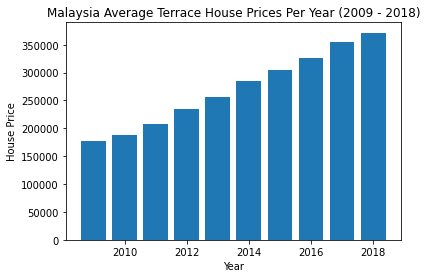

In [20]:
years = sorted(set(df["Tahun"].astype("int32")))
my_averages = {}

# Calculate Average Per Year Based on 4 Quarters
for year in years:
    my_averages[year] = df[df["Tahun"] == year]["Malaysia"].mean()

print("Average Terrace House Prices Per Year:")
for key in my_averages:
    print(f'{key} : {my_averages[key]}')

# Average Rate Calculation (Unused)
# rates = np.array([0])
# for i in range(2010, 2019):
#     yearly_rate = (my_averages[i] - my_averages[i-1]) / my_averages[i-1]
#     rates = np.append(rates, yearly_rate)

# print("Average House Price Change:", np.mean(rates))

plt.bar(years, my_averages.values())
plt.title("Malaysia Average Terrace House Prices Per Year (2009 - 2018)")
plt.xlabel("Year")
plt.ylabel("House Price")
plt.show()

## Least Square Method to Find the Best Fitted Linear Line (Malaysia)

Least Square Regression Line: y = 22764.181818181823x + 168140.13181818172
Years Since 2009: 0 	| Fitted Price of House: 168140.13181818172 	| Percentage Difference: -4.69
Years Since 2009: 1 	| Fitted Price of House: 190904.31363636354 	| Percentage Difference: 1.43
Years Since 2009: 2 	| Fitted Price of House: 213668.49545454537 	| Percentage Difference: 2.87
Years Since 2009: 3 	| Fitted Price of House: 236432.6772727272 	| Percentage Difference: 0.64
Years Since 2009: 4 	| Fitted Price of House: 259196.859090909 	| Percentage Difference: 0.89
Years Since 2009: 5 	| Fitted Price of House: 281961.04090909084 	| Percentage Difference: -0.77
Years Since 2009: 6 	| Fitted Price of House: 304725.22272727266 	| Percentage Difference: 0.3
Years Since 2009: 7 	| Fitted Price of House: 327489.4045454545 	| Percentage Difference: 0.32
Years Since 2009: 8 	| Fitted Price of House: 350253.5863636363 	| Percentage Difference: -1.52
Years Since 2009: 9 	| Fitted Price of House: 373017.76818181813

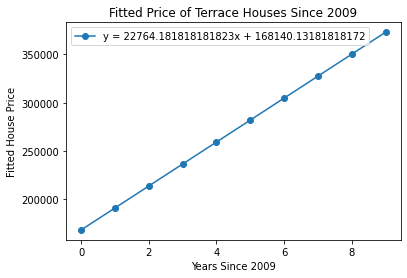

In [21]:
years_since = np.array([i for i in range(0,10)])
prices_only = np.array([[i] for i in list(my_averages.values())])

A = np.vstack((years_since, np.ones((1,10), dtype='int32'))).transpose()
x = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), prices_only))

regression_line = f"y = {x[0][0]}x + {x[1][0]}"
print(f"Least Square Regression Line: {regression_line}")

fit_y = [(i*x[0][0] + x[1][0]) for i in range(0,10)]

for i in range(0, 10):
    perc_diff = (fit_y[i] - prices_only[i][0]) / prices_only[i][0] * 100
    print(f"Years Since 2009: {i} \t| Fitted Price of House: {fit_y[i]} \t| Percentage Difference: {round(perc_diff,2)}")

plt.plot(years_since, fit_y, marker="o", label=regression_line)
plt.title("Fitted Price of Terrace Houses Since 2009")
plt.xlabel("Years Since 2009")
plt.ylabel("Fitted House Price")
plt.legend()
plt.show()

## Repeating the Steps to Calculate for All Other Regions

In [22]:
all_data = []
years_since = np.array([i for i in range(0,10)])

for region in columns:
    region_averages = np.array([])
    for year in years:
        region_averages = np.append(region_averages, df[df["Tahun"] == year][region].mean())

    A = np.vstack((years_since, np.ones((1,10), dtype='int32'))).transpose()
    x = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), region_averages))

    regression_line = f"y = {x[0]}x + {x[1]}"
    all_data.append([region, regression_line])

all_equations = pd.DataFrame(all_data, columns=["Region", "Regression Line"])
all_equations

[176413.75 188207.   207702.25 234933.75 256910.25 284135.5  303826.
 326445.5  355647.5  371568.  ]
[358224.25 381372.5  449250.   500472.25 561917.5  625200.   681130.
 735551.   811832.75 855589.  ]
[222432.25 248290.5  280323.   322256.   342240.75 372253.75 403319.5
 440167.5  487176.5  510004.5 ]
[139252.25 136040.25 137962.75 154306.   184511.5  214332.25 225546.25
 246970.75 273674.5  290036.5 ]
[256246.5  271474.75 295665.75 329806.   369328.25 409743.75 435399.5
 445699.75 473262.75 470090.  ]
[106519.25 111024.   124303.5  135462.75 144689.   157483.   171664.
 188694.   206100.25 221012.  ]
[100182.   104191.75 115332.75 127197.5  135572.   148222.25 160082.5
 168707.   178406.75 186064.  ]
[ 88240.5   92011.5   96164.   102436.25 112645.   115404.25 123848.25
 136058.75 145246.   154102.5 ]
[ 96670.75 103191.5  110351.75 114699.5  124865.   128989.75 137052.
 145954.   153559.25 161143.5 ]
[123895.   128372.5  142022.   157666.   170643.5  188583.75 201391.5
 209999.75 218

,Region,Regression Line
0,Malaysia,y = 22764.181818181823x + 168140.13181818172
1,Kuala Lumpur,y = 57734.94090909086x + 336246.6909090909
2,Selangor,y = 32319.868181818194x + 217407.0181818182
3,Johor,y = 18842.906060606067x + 115470.22272727266
4,Pulau Pinang,y = 26936.203030303033x + 254458.78636363626
5,Negeri Sembilan,y = 12965.568181818177x + 98350.11818181822
6,Perak,y = 10124.96666666666x + 96833.5
7,Melaka,y = 7465.8696969696975x + 83019.28636363638
8,Kedah,y = 7163.772727272721x + 95410.72272727272
9,Pahang,y = 11854.525757575757x + 122448.95909090916
